In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "breast-cancer-wisconsin-data"

In [2]:
#Importing Libraries

library(readr)
library(ggplot2)
library(plotly)
library(dplyr)
library(naniar)
library(tidyverse)
library(ggcorrplot) # finding the correlation with variables 
library(caTools)# splitting data into training set test set 
library(caret)
library(corrplot)
library(pROC)
library(MLmetrics)
library(rpart)
library(rpart.plot) 
library(randomForest)
library(varImp)
library(gbm)
library(
readr,dplyr)
library("corrplot")
library("gridExtra")
library("MASS")
library("caTools")
library("caret")



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


corrplot 0.92 loaded

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var



Attaching package: ‘MLmetrics’


The following objects are masked from ‘package:caret’:

    MAE, RMSE


The following object is masked from ‘package:base’:

    Recall


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘pack

In [3]:
#Importing Data
data_cancer <- read.csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [4]:
#view first 7 rows data 
head(data_cancer)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,X
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NA
5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NA
6,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NA


In [5]:
# Seeing the structure and the summary of the data
str(data_cancer)

'data.frame':	569 obs. of  33 variables:
 $ id                     : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ diagnosis              : chr  "M" "M" "M" "M" ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se             : num  0.905 0.734 0.787 1

In [6]:
#converts the diagnosis column of thedata frame to a factor variable
data_cancer$diagnosis <- as.factor(data_cancer$diagnosis)

data_cancer[,33] <- NULL #removes the 33rd column from the data_cancer data frame.
## We then find summary of the dataset 
summary(data_cancer)

       id            diagnosis  radius_mean      texture_mean  
 Min.   :     8670   B:357     Min.   : 6.981   Min.   : 9.71  
 1st Qu.:   869218   M:212     1st Qu.:11.700   1st Qu.:16.17  
 Median :   906024             Median :13.370   Median :18.84  
 Mean   : 30371831             Mean   :14.127   Mean   :19.29  
 3rd Qu.:  8813129             3rd Qu.:15.780   3rd Qu.:21.80  
 Max.   :911320502             Max.   :28.110   Max.   :39.28  
 perimeter_mean     area_mean      smoothness_mean   compactness_mean 
 Min.   : 43.79   Min.   : 143.5   Min.   :0.05263   Min.   :0.01938  
 1st Qu.: 75.17   1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492  
 Median : 86.24   Median : 551.1   Median :0.09587   Median :0.09263  
 Mean   : 91.97   Mean   : 654.9   Mean   :0.09636   Mean   :0.10434  
 3rd Qu.:104.10   3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040  
 Max.   :188.50   Max.   :2501.0   Max.   :0.16340   Max.   :0.34540  
 concavity_mean    concave.points_mean symmetry_mean   

# #Data Visualization

In [7]:
## we find that data is little unbalanced
prop.table(table(data_cancer$diagnosis))


        B         M 
0.6274165 0.3725835 

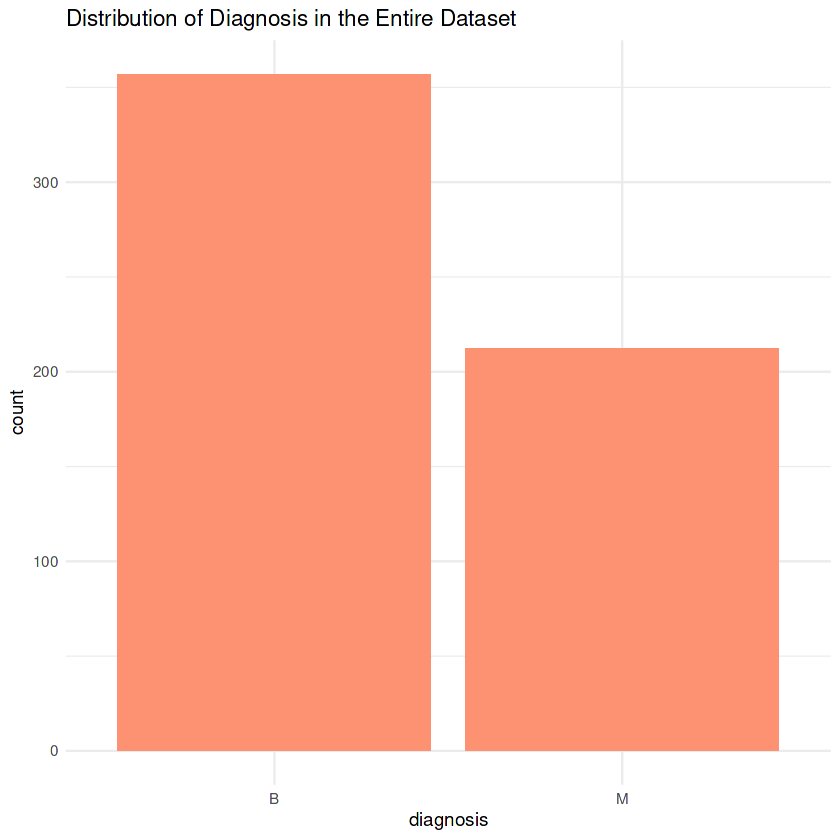

In [14]:
ggplot(data_cancer, aes(x = diagnosis)) +
  geom_bar(fill = "#fc9272") +
  ggtitle("Distribution of Diagnosis in the Entire Dataset") +
  theme_minimal() +
  theme(legend.position = "none")

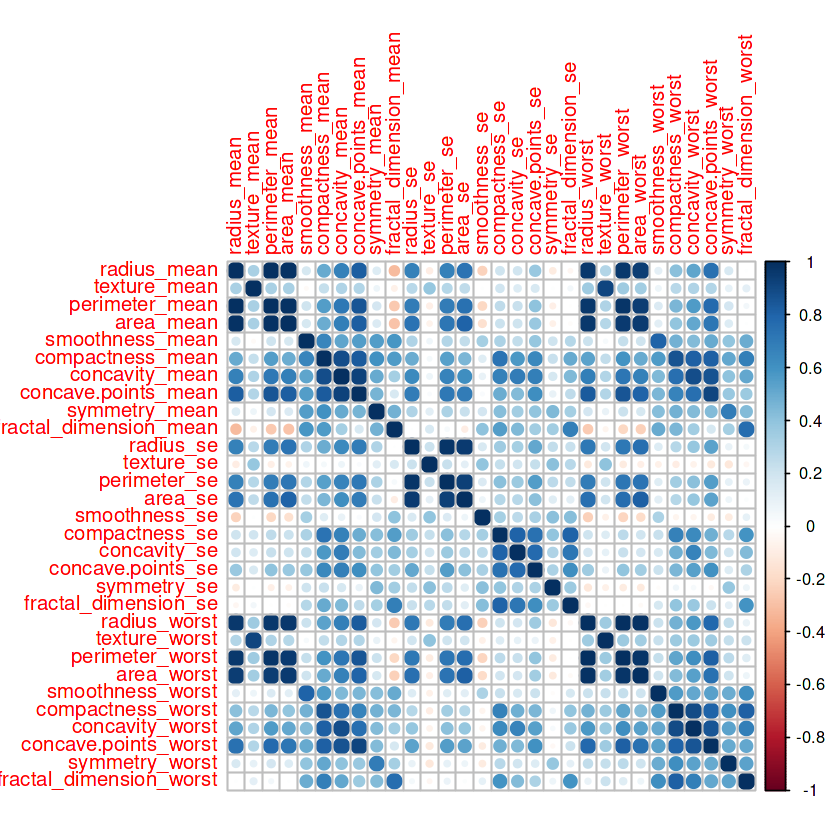

In [8]:
## we then show some correlation 
corr_mat <- cor(data_cancer[,3:ncol(data_cancer)])
corrplot(corr_mat)

In [9]:
#visualize all the variable in the data frame
data_1 <- data_cancer %>%
  as.data.frame() %>%
  select_if(is.numeric) %>%
  gather(key = "variable", value = "value")

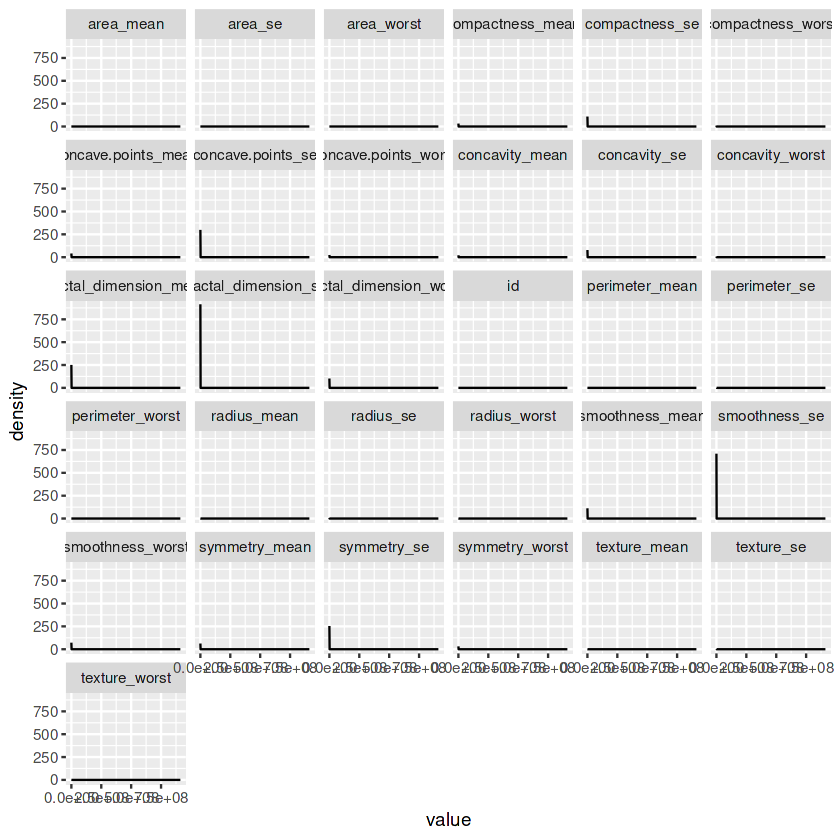

In [10]:
ggplot(data_1, aes(value)) +
  geom_density() +
  facet_wrap(~variable)

In [11]:
## checking missing values
sum(is.na(data_cancer))

[1] 0

In [13]:
#check whether every columns have no missing values
sapply(data_cancer,function(x)sum(is.na(x)))

id               diagnosis             radius_mean 
                      0                       0                       0 
           texture_mean          perimeter_mean               area_mean 
                      0                       0                       0 
        smoothness_mean        compactness_mean          concavity_mean 
                      0                       0                       0 
    concave.points_mean           symmetry_mean  fractal_dimension_mean 
                      0                       0                       0 
              radius_se              texture_se            perimeter_se 
                      0                       0                       0 
                area_se           smoothness_se          compactness_se 
                      0                       0                       0 
           concavity_se       concave.points_se             symmetry_se 
                      0                       0                       0 
   fractal_dimension_se            radius_worst           texture_worst 
                      0                       0                       0 
        perimeter_worst              area_worst        smoothness_worst 
                      0                       0                       0 
      compactness_worst         concavity_worst    concave.points_worst 
                      0                       0                       0 
         symmetry_worst fractal_dimension_worst 
                      0                       0

# Modelling

In [12]:
## We are going to get a training and a testing set to use when building some models:
set.seed(1234)
data_index <- createDataPartition(data_cancer$diagnosis, p=0.7, list = FALSE)
train_data <- data_cancer[data_index, -1]
test_data <- data_cancer[-data_index, -1]

In [15]:
## Applying learning models
fitControl <- trainControl(method="cv",
                           number = 5,
                           preProcOptions = list(thresh = 0.99), # threshold for pca preprocess
                           classProbs = TRUE,
                           summaryFunction = twoClassSummary)

# Support Vector Machine Model

In [25]:
library(e1071)

regressor_svm <- svm(formula = diagnosis ~ ., 
                    data=train_data,
                    type = 'C-classification',
                    kernel = 'linear')

In [26]:
## testing for SVM
pred_svm <- predict(regressor_svm, test_data)
cm_svm <- confusionMatrix(pred_svm, test_data$diagnosis, positive = "M")
cm_svm

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 107   7
         M   0  56
                                         
               Accuracy : 0.9588         
                 95% CI : (0.917, 0.9833)
    No Information Rate : 0.6294         
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.9097         
                                         
 Mcnemar's Test P-Value : 0.02334        
                                         
            Sensitivity : 0.8889         
            Specificity : 1.0000         
         Pos Pred Value : 1.0000         
         Neg Pred Value : 0.9386         
             Prevalence : 0.3706         
         Detection Rate : 0.3294         
   Detection Prevalence : 0.3294         
      Balanced Accuracy : 0.9444         
                                         
       'Positive' Class : M              
                                         